# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [83]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create object to get the temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country_c=[]
dates = []

# Get city information in JSON format
for x in range(len(cities)):
    response = requests.get(f"{url}appid={api_key}&units={units}&q={cities[x]}").json()
    
     # Some of the cities don't have data in openweathermap, so set their values to NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        country_c.append(response['sys']['country'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        country_c.append(np.nan)
        dates.append(np.nan)
    
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
      # Print each city name and number string    
    print(f"City number and name: {x + 1} |  {cities[x]}")
    


City number and name: 1 |  hobart
City number and name: 2 |  jamestown
City number and name: 3 |  vostok
City number and name: 4 |  aguai
City number and name: 5 |  atuona
City number and name: 6 |  chihuahua
City number and name: 7 |  ancud
City number and name: 8 |  ozernovskiy
City number and name: 9 |  nicoya
City number and name: 10 |  chifeng
City number and name: 11 |  khani
City number and name: 12 |  kavaratti
City number and name: 13 |  bluff
City number and name: 14 |  cape town
City number and name: 15 |  zhigansk
City number and name: 16 |  rikitea
City number and name: 17 |  sobolevo
City number and name: 18 |  ilongero
City number and name: 19 |  vaini
City number and name: 20 |  ushuaia
City number and name: 21 |  albany
City number and name: 22 |  tuktoyaktuk
City number and name: 23 |  busselton
City number and name: 24 |  hailar
City number and name: 25 |  vallenar
City number and name: 26 |  new norfolk
City number and name: 27 |  bredasdorp
City number and name: 28

City number and name: 218 |  sola
City number and name: 219 |  cabo san lucas
City number and name: 220 |  bethel
City number and name: 221 |  karaton
City number and name: 222 |  yar-sale
City number and name: 223 |  sorong
City number and name: 224 |  gat
City number and name: 225 |  oskemen
City number and name: 226 |  heswall
City number and name: 227 |  laredo
City number and name: 228 |  grenfell
City number and name: 229 |  solnechnyy
City number and name: 230 |  camacupa
City number and name: 231 |  leh
City number and name: 232 |  savelugu
City number and name: 233 |  boa vista
City number and name: 234 |  gorontalo
City number and name: 235 |  cap-chat
City number and name: 236 |  fairbanks
City number and name: 237 |  honnali
City number and name: 238 |  norwich
City number and name: 239 |  yellowknife
City number and name: 240 |  arrecife
City number and name: 241 |  saveh
City number and name: 242 |  vanimo
City number and name: 243 |  palmer
City number and name: 244 |  p

City number and name: 436 |  reci
City number and name: 437 |  yarensk
City number and name: 438 |  fort nelson
City number and name: 439 |  brownwood
City number and name: 440 |  anloga
City number and name: 441 |  berlevag
City number and name: 442 |  ornskoldsvik
City number and name: 443 |  nanakuli
City number and name: 444 |  luanda
City number and name: 445 |  pampa
City number and name: 446 |  ruteng
City number and name: 447 |  san rafael
City number and name: 448 |  zabol
City number and name: 449 |  iquique
City number and name: 450 |  limulunga
City number and name: 451 |  ostrov
City number and name: 452 |  pandoh
City number and name: 453 |  souillac
City number and name: 454 |  fukuma
City number and name: 455 |  namatanai
City number and name: 456 |  acapulco
City number and name: 457 |  carutapera
City number and name: 458 |  lixourion
City number and name: 459 |  ulaanbaatar
City number and name: 460 |  namibe
City number and name: 461 |  zabaykalsk
City number and na

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
# Assemble everything into a data frame
weather_data = pd.DataFrame({"City": cities,
                           "Cloudiness": cloudiness,
                           "Country": country_c,
                           "Date": dates,
                           "Humidity": humidity,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Max Temp": temperature,
                           "Wind Speed": wind_speed,
                           })


# Remove any cities that have NaN values
weather_data = weather_data.dropna(how='any')

# Exporting weather data into csv file
weather_data.to_csv("../Output/weather_data.csv")

weather_data.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Latitude      558
Longitude     558
Max Temp      558
Wind Speed    558
dtype: int64

In [59]:
# Display the weather dataframe
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,hobart,75,AU,1.572638e+09,87.0,-42.88,147.33,59.00,4.70
1,jamestown,100,AU,1.572639e+09,88.0,-33.21,138.60,57.31,5.08
2,vostok,97,RU,1.572638e+09,93.0,46.45,135.83,20.89,7.63
3,aguai,75,IT,1.572638e+09,76.0,46.30,11.40,53.60,2.24
4,atuona,17,PF,1.572638e+09,75.0,-9.80,-139.03,80.02,14.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

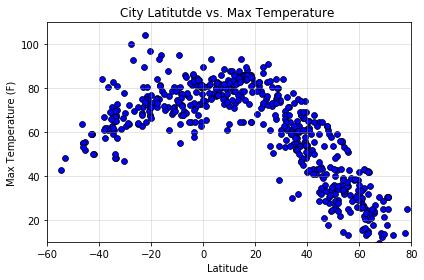

In [84]:
# Plot the lat vs the max temp
plt.scatter(weather_data['Latitude'],weather_data['Max Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)
#formatting and titles

plt.title("City Latitutde vs. Max Temperature ")
plt.xlabel("Latitude ")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60,80,20)
plt.ylim(10,110,10)
plt.grid(alpha = .4)
plt.tight_layout()

# Save the Figure
plt.gcf()
plt.savefig("../Images/CityLatVsTemp.png")

plt.show()

#### Latitude vs. Humidity Plot

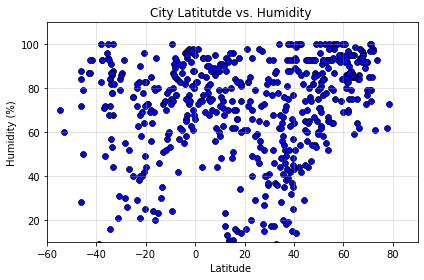

In [85]:
# Plot the lat vs the Humidity
plt.scatter(weather_data['Latitude'],weather_data['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

#formatting and titles

plt.title("City Latitutde vs. Humidity ")
plt.xlabel("Latitude ")
plt.ylabel("Humidity (%)")
plt.xlim(-60,90,20)
plt.ylim(10,110,10)
plt.grid(alpha = .4)
plt.tight_layout()

# Save the Figure
plt.gcf()
plt.savefig("../Images/CityLatVsHumidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

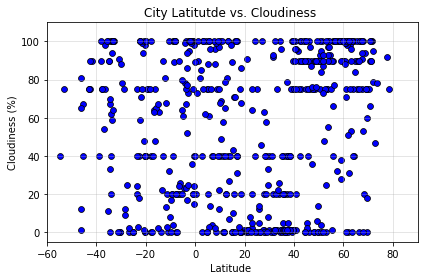

In [86]:
# Plot the lat vs the Cloudiness
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)
#formatting and titles

plt.title("City Latitutde vs. Cloudiness ")
plt.xlabel("Latitude ")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60,90,20)
plt.ylim(-5,110,20)
plt.grid(alpha = .4)
plt.tight_layout()

# Save the Figure
plt.gcf()
plt.savefig("../Images/CityLatVsCloud.png")

plt.show()

#### Latitude vs. Wind Speed Plot

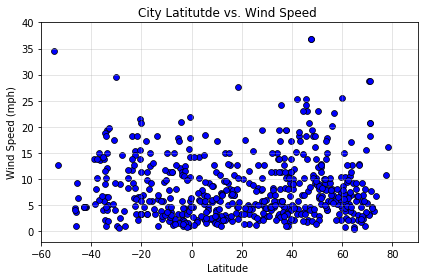

In [87]:
# Plot the lat vs the Wind Speed
plt.scatter(weather_data['Latitude'],weather_data['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)
#formatting and titles

plt.title("City Latitutde vs. Wind Speed ")
plt.xlabel("Latitude ")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-60,90,20)
plt.ylim(-2,40,5)
plt.grid(alpha = .4)
plt.tight_layout()

# Save the Figure
plt.gcf()
plt.savefig("../Images/CityLatVsWspeed.png")

plt.show()